In [14]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('enviro_data.csv', names=['DTG', 'temp', 'humidity', 'baro_pressure', 'co_2', 'tvoc', 'uv_raw', 
                                           'amb_raw', 'uv_idx', 'lux','violet', 'indigo', 'blue', 'cyan', 'green', 
                                           'yellow', 'orange', 'red', 'loc_class'])

In [8]:
df.columns

Index(['DTG', 'temp', 'humidity', 'baro_pressure', 'co_2', 'tvoc', 'uv_raw',
       'amb_raw', 'uv_idx', 'lux', 'violet', 'indigo', 'blue', 'cyan', 'green',
       'yellow', 'orange', 'red', 'loc_class'],
      dtype='object')

In [9]:
ind_vars = ['temp', 'humidity', 'baro_pressure', 'co_2', 'tvoc','uv_idx', 'lux', 'violet', 'indigo', 'blue', 'cyan', 'green',
       'yellow', 'orange', 'red']

X = df[ind_vars]

y = df['loc_class']

In [10]:
def build_and_eval_model(model, X, Y, random_state=42):
    print('Running report for model', model)
    
    # test, train, split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state)
    
    # fit the model
    model.fit(X_train, y_train)
    
    # get and print accuracy
    accuracy = model.score(X_test, y_test)
    print('\n\nAccuracy %f' % accuracy)
    
    # makde new predictions
    y_pred = model.predict(X_test)
    
    # print classification report
    print(metrics.classification_report(y_test, y_pred))
    
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(13,13))
    
    metrics.plot_confusion_matrix(estimator=model,
                                 X=X_test,
                                 y_true=y_test,
                                 ax=ax)
    
    return model

Running report for model MultinomialNB()


Accuracy 0.736127
              precision    recall  f1-score   support

        blue       0.62      0.47      0.54       571
       green       0.73      0.72      0.72       588
      yellow       0.81      1.00      0.89       607

    accuracy                           0.74      1766
   macro avg       0.72      0.73      0.72      1766
weighted avg       0.72      0.74      0.72      1766



MultinomialNB()

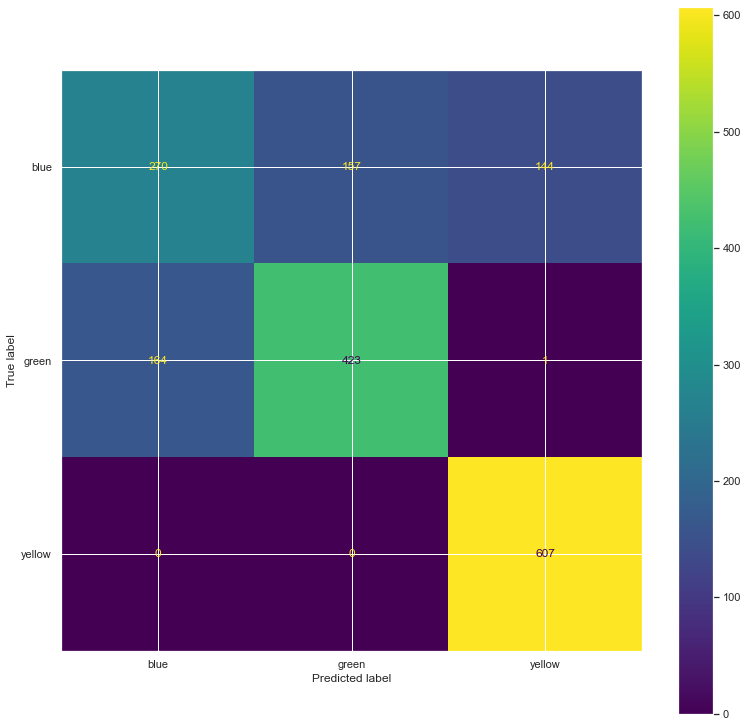

In [11]:
# Multinomial NB
mnb = MultinomialNB()
build_and_eval_model(mnb, X, y)

Running report for model LogisticRegression()


Accuracy 0.880521
              precision    recall  f1-score   support

        blue       0.80      0.85      0.82       571
       green       0.85      0.83      0.84       588
      yellow       1.00      0.96      0.98       607

    accuracy                           0.88      1766
   macro avg       0.88      0.88      0.88      1766
weighted avg       0.88      0.88      0.88      1766



/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

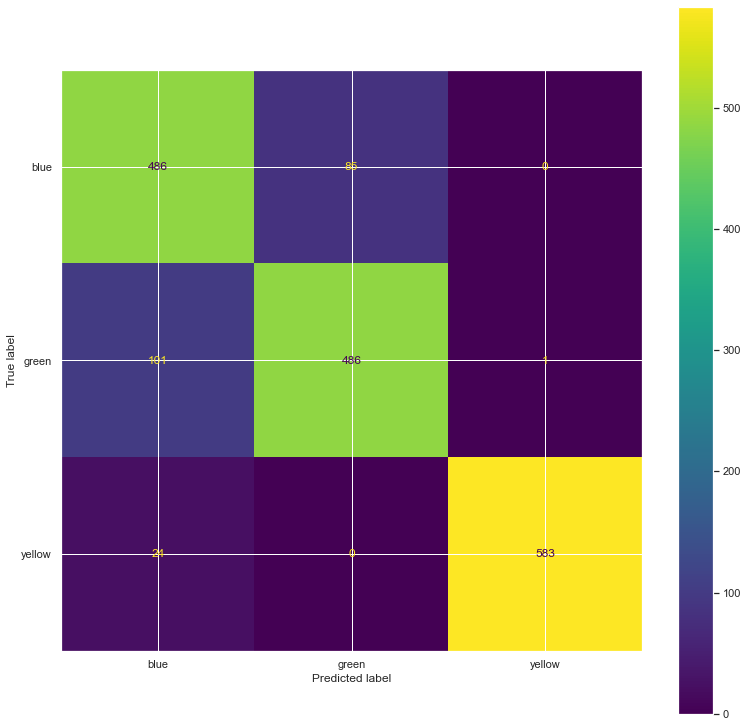

In [12]:
# Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
build_and_eval_model(lr, X, y)

Running report for model RandomForestClassifier()


Accuracy 1.000000
              precision    recall  f1-score   support

        blue       1.00      1.00      1.00       571
       green       1.00      1.00      1.00       588
      yellow       1.00      1.00      1.00       607

    accuracy                           1.00      1766
   macro avg       1.00      1.00      1.00      1766
weighted avg       1.00      1.00      1.00      1766



RandomForestClassifier()

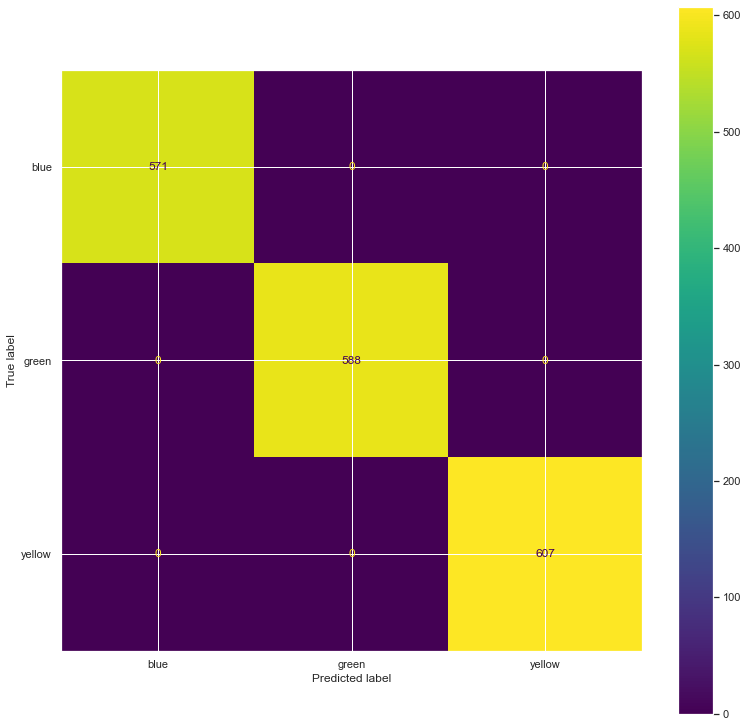

In [13]:
# Random Forest
rf = RandomForestClassifier()
build_and_eval_model(rf, X, y)

Running report for model SVC(probability=True)


Accuracy 0.780861
              precision    recall  f1-score   support

        blue       0.73      0.51      0.60       571
       green       0.80      0.81      0.81       588
      yellow       0.80      1.00      0.89       607

    accuracy                           0.78      1766
   macro avg       0.77      0.78      0.76      1766
weighted avg       0.77      0.78      0.77      1766



SVC(probability=True)

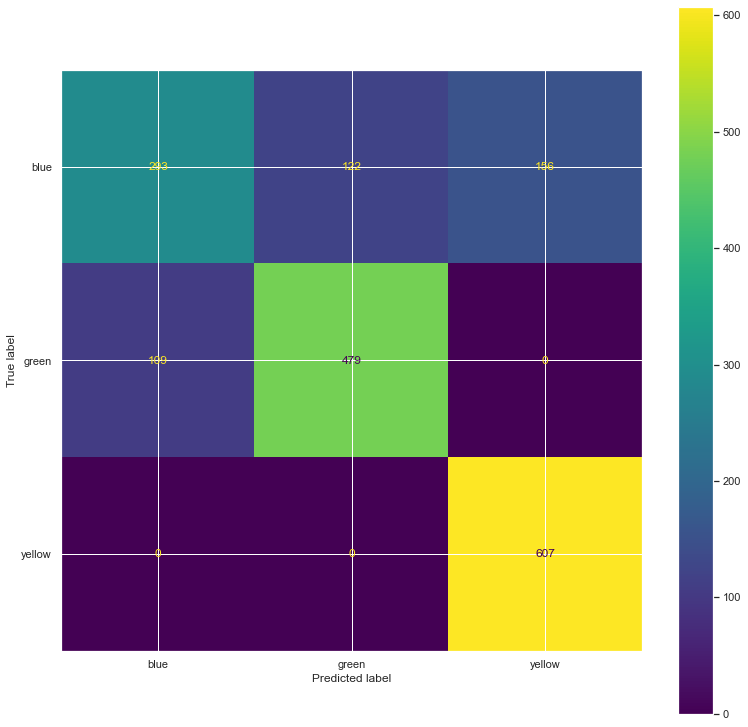

In [15]:
# SVM
svm_m = svm.SVC(probability=True)
build_and_eval_model(svm_m, X, y)

In [16]:
data = {'Model': ['Multinomial Naive Bayes','Logistic Regression','Random Forest', 'Support Vector Machine'],
        'Accuracy': [ 0.73, 0.88, 1.0, 0.78]
        }

df_1 = pd.DataFrame(data, columns = ['Model', 'Accuracy'])
df_1

,Model,Accuracy
0,Multinomial Naive Bayes,0.73
1,Logistic Regression,0.88
2,Random Forest,1.00
3,Support Vector Machine,0.78
